In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

> - 과거의 관측 데이터로부터 "$x0<x1$일 경우 $y=0$, $x0>x1$일 때 $y=1$"라는 규칙을 발견
> - `make_blobs`로 (0.3,0.7), (0.7,0.3)을 기준으로 std가 0.1인 가상 데이터 집합 생성
> - 위 규칙을 적용했을 때 식별 정확도는?

- `make_blobs`로 데이터 생성 시, `x_dataset`은 2차원 배열, `y_dataset`은 (0,1) 1차원 배열로 구성


In [4]:
x_dataset, y_dataset = make_blobs(centers = [[0.3, 0.7], [0.7, 0.3]],
                                 cluster_std = 0.1,
                                 center_box = (0, 1),
                                 random_state = 42)

- pandas로 데이터 변환

In [10]:
dataset = pd.DataFrame(x_dataset, columns = ['x0', 'x1'])
dataset['y'] = y_dataset
dataset.head()

,x0,x1,y
0,0.747324,0.292717,1
1,0.216078,0.669079,0
2,0.508123,0.297349,1
3,0.252083,0.681434,0
4,0.602532,0.378708,1


- 예측 함수를 생성하고, 만든 함수로 가상 데이터에 대입

In [16]:
# 예측 함수
def predict(x0,x1):
  if x0<x1:
    y = 0
  else:
    y=1
  return y

# 가상 데이터로 예측
pred = dataset.apply(lambda X: predict(X.x0, X.x1), axis = 1)
pred.head()

0    1
1    0
2    1
3    0
4    1
dtype: int64

- `predict`로 식별한 결과와 원래 레이블을 비교해서 정확도 계산

In [17]:
result = pred==dataset.y
accuracy = result[result==True].count() / result.count()
print('Accuracy: %f' % accuracy)

Accuracy: 1.000000


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


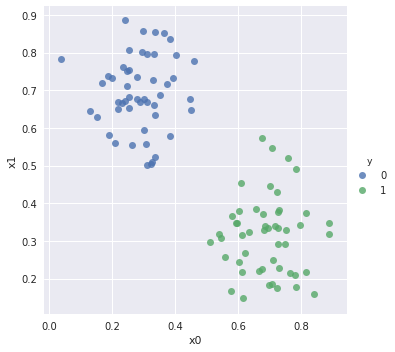

In [22]:
sns.lmplot('x0', 'x1', hue = 'y', data=dataset, fit_reg=False)

- 문제는 새로운 형태의 데이터가 등장할 경우임
- 다음을 보면 데이터가 혼재되어 있는 것을 볼 수 있고, 이렇게 경향이 매우 다를 시, 규칙 기반으로 분류는 한계가 있음
- 이 때 사용 하는 것이 Machine Learning으로 기계가 자동으로 식별 결계를 그리도록 함

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


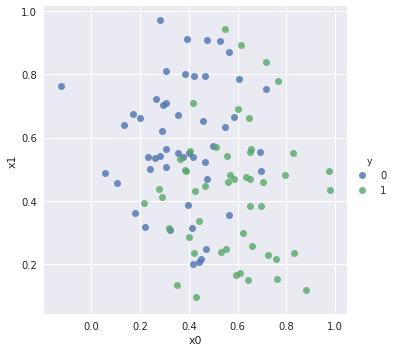

In [25]:
new_x_dataset, new_y_dataset = make_blobs(centers = [[0.4, 0.6], [0.6, 0.4]],
                                 cluster_std = 0.2,
                                 center_box = (0, 1),
                                 random_state = 42)
new_dataset = pd.DataFrame(new_x_dataset, columns = ['x0','x1'])
new_dataset['y']=new_y_dataset

sns.lmplot('x0', 'x1', hue = 'y', data=new_dataset, fit_reg=False)